Kritya Shree Sivasakthi

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2022-11-29 05:09:02--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip.3’

tiny-imagenet-200.z 100%[===================>] 236.61M  15.2MB/s    in 24s     

2022-11-29 05:09:27 (9.71 MB/s) - ‘tiny-imagenet-200.zip.3’ saved [248100043/248100043]



In [ ]:
!unzip -q tiny-imagenet-200.zip && ls tiny-imagenet-200

replace tiny-imagenet-200/words.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
test  train  val  wnids.txt  words.txt


In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory('/content/tiny-imagenet-200/train', image_size=(64,64))

Found 100000 files belonging to 200 classes.


In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory('/content/tiny-imagenet-200/test/', image_size=(64,64))

Found 10000 files belonging to 1 classes.


In [ ]:
val_annot = pd.read_csv('/content/tiny-imagenet-200/val/val_annotations.txt', sep='\t', header=None, names=['File', 'Class', 'X', 'Y', 'H', 'W'])

In [ ]:
val_annot

,File,Class,X,Y,H,W
0,val_0.JPEG,n03444034,0,32,44,62
1,val_1.JPEG,n04067472,52,55,57,59
2,val_2.JPEG,n04070727,4,0,60,55
3,val_3.JPEG,n02808440,3,3,63,63
4,val_4.JPEG,n02808440,9,27,63,48
...,...,...,...,...,...,...
9995,val_9995.JPEG,n03085013,0,0,63,63
9996,val_9996.JPEG,n03444034,0,9,63,63
9997,val_9997.JPEG,n03424325,10,10,38,42
9998,val_9998.JPEG,n01629819,28,18,63,31


In [ ]:
val_annot_dict = val_annot[['File', 'Class']].set_index('File').to_dict()['Class']

In [ ]:
val_img_dir = '/content/tiny-imagenet-200/val/images/'
for img, folder in val_annot_dict.items():
    newpath = (os.path.join(val_img_dir, folder))
    print(newpath)
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    if os.path.exists(os.path.join(val_img_dir, img)):
        os.rename(os.path.join(val_img_dir, img), os.path.join(newpath, img))

Streaming output truncated to the last 5000 lines.
/content/tiny-imagenet-200/val/images/n02074367
/content/tiny-imagenet-200/val/images/n03977966
/content/tiny-imagenet-200/val/images/n03424325
/content/tiny-imagenet-200/val/images/n02236044
/content/tiny-imagenet-200/val/images/n01882714
/content/tiny-imagenet-200/val/images/n07711569
/content/tiny-imagenet-200/val/images/n03160309
/content/tiny-imagenet-200/val/images/n03544143
/content/tiny-imagenet-200/val/images/n01882714
/content/tiny-imagenet-200/val/images/n02909870
/content/tiny-imagenet-200/val/images/n02226429
/content/tiny-imagenet-200/val/images/n03085013
/content/tiny-imagenet-200/val/images/n02909870
/content/tiny-imagenet-200/val/images/n02808440
/content/tiny-imagenet-200/val/images/n01984695
/content/tiny-imagenet-200/val/images/n03983396
/content/tiny-imagenet-200/val/images/n01917289
/content/tiny-imagenet-200/val/images/n04008634
/content/tiny-imagenet-200/val/images/n03026506
/content/tiny-imagenet-200/val/images

In [ ]:
val_data = tf.keras.utils.image_dataset_from_directory('/content/tiny-imagenet-200/val/images/', image_size=(64,64))

Found 10000 files belonging to 200 classes.


In [ ]:
train_data.as_numpy_iterator().next()[0].shape

(32, 64, 64, 3)

In [ ]:
train_class_names = train_data.class_names
val_class_names = val_data.class_names

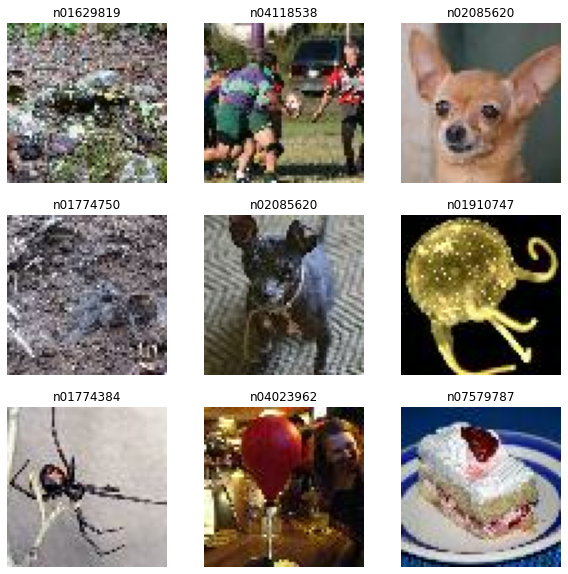

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_class_names[labels[i]])
    plt.axis("off")

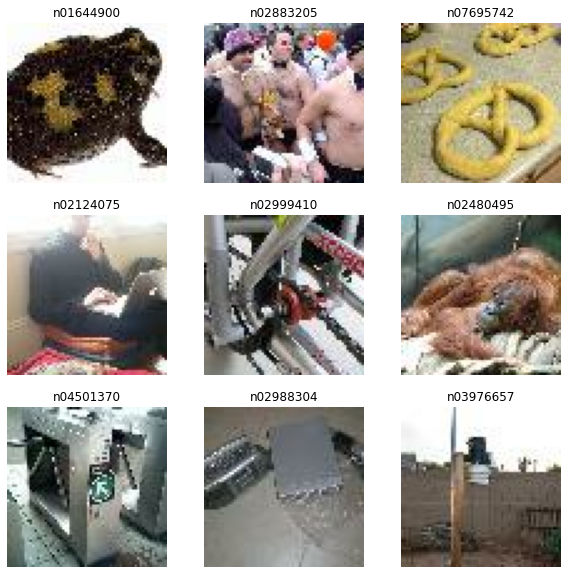

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in val_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(val_class_names[labels[i]])
    plt.axis("off")

In [ ]:
words = pd.read_csv('/content/tiny-imagenet-200/words.txt', sep='\t', header=None, names=['file', 'label'])

In [ ]:
words_dict = words.set_index('file').to_dict()['label']

In [ ]:
train_labels, val_labels = [], []
for i in train_data.class_names:
    train_labels.append(words_dict.get(i))
for i in val_data.class_names:
    val_labels.append(words_dict.get(i))

In [ ]:
train_size = int(len(train_data)*.7)
val_size = int(len(train_data)*.3)

train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)

In [ ]:
train_data.class_names = train_labels
val_data.class_names = val_labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(train_data.class_names)
train_data.class_names = le.transform(train_data.class_names)

In [ ]:
train_data = train_data.map(lambda x,y: (x/63, y))
val_data = val_data.map(lambda x,y: (x/63, y))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation, UpSampling2D, SeparableConv2D, ReLU, GlobalMaxPooling2D, SpatialDropout2D, ActivityRegularization

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D, GlobalMaxPooling2D

# from tensorflow.keras.applications.xception import Xception
# from tensorflow.keras.models import Model

# base_model = Xception(weights='imagenet', include_top=False, input_shape=(256,256,3))
# base_model.trainable = False

# # add a global spatial average pooling layer
# x = base_model.output

# # let's add a fully-connected layer
# # x = Dense(1024, activation='relu')(x)
# # and a logistic layer -- let's say we have 200 classes
# # predictions = Dense(200, activation='softmax')(x)

# # xception_model = Model(inputs=base_model.input, outputs=predictions)
# # first: train only the top layers (which were randomly initialized)
# # i.e. freeze all convolutional InceptionV3 layers
# for layer in base_model.layers:
#     layer.trainable = False

# # # model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# # logdir='logs'
# # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
# # reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=0.01)
# # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# # hist = model.fit(train_data, epochs=20, validation_data=val_data, callbacks=[early_stopping, reduce_lr])
# # # hist = model.fit(train_data, epochs=5, validation_data=val_data, callbacks=[tensorboard_callback])

In [ ]:
# Original

model = Sequential()
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 2, activation='relu'))
model.add(MaxPooling2D())

# model.add(Conv2D(4, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(200, activation='softmax'))

In [ ]:
# Version 1

model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', padding='same', input_shape=(256,256,3)))
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(32, (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(.4))

model.add(Conv2D(64, (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(.4))

model.add(Conv2D(128, (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(.2))

model.add(Conv2D(256, (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

# model.add(Conv2D(512, (3,3), 1, activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(200, activation='softmax'))


In [ ]:
# Own Model
model = Sequential()
model.add(Conv2D(32, (3,3), 2 , activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(SpatialDropout2D(0.3))

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(SpatialDropout2D(0.3))

model.add(Conv2D(256, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(200, activation='softmax'))


In [ ]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=0.01)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='/content/tiny-imagenet-200/', monitor='val_accuracy')

In [ ]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_128 (Conv2D)         (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_119 (MaxPooli  (None, 31, 31, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_129 (Conv2D)         (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_120 (MaxPooli  (None, 14, 14, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_130 (Conv2D)         (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_121 (MaxPooli  (None, 6, 6, 128)      

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train_data, epochs=30, batch_size=32, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/30
3125/3125 [==============================] - 45s 14ms/step - loss: 4.9055 - accuracy: 0.0323 - val_loss: 4.5940 - val_accuracy: 0.0584
Epoch 2/30
3125/3125 [==============================] - 47s 15ms/step - loss: 4.3892 - accuracy: 0.0831 - val_loss: 4.2306 - val_accuracy: 0.1048
Epoch 3/30
3125/3125 [==============================] - 44s 14ms/step - loss: 4.1441 - accuracy: 0.1146 - val_loss: 4.0892 - val_accuracy: 0.1251
Epoch 4/30
3125/3125 [==============================] - 46s 15ms/step - loss: 3.9947 - accuracy: 0.1325 - val_loss: 4.0022 - val_accuracy: 0.1316
Epoch 5/30
3125/3125 [==============================] - 46s 15ms/step - loss: 3.8871 - accuracy: 0.1466 - val_loss: 4.0009 - val_accuracy: 0.1361
Epoch 6/30
3125/3125 [==============================] - 47s 15ms/step - loss: 3.8031 - accuracy: 0.1585 - val_loss: 3.9427 - val_accuracy: 0.1431


In [ ]:
# Own Model
model = Sequential()
model.add(Conv2D(32, (3,3), 2 , activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(SpatialDropout2D(0.3))

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(200, activation='softmax'))

In [ ]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train_data, epochs=30, batch_size=64, validation_data=val_data, callbacks=[tensorboard_callback])